## Imports

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jabel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Recogemos	los datos de la base de datos
# y los guardamos en un dataframe
df = pd.read_csv('../data/train.csv')

In [3]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [5]:
# Limpiar texto
def clean_text(text):
    # Eliminar urls
	text = re.sub(r'http\S+', ' ', str(text))
 
 	# Eliminar signos de puntuación
	text = re.sub(r'[^\w\s]', ' ', str(text))
 
	# Eliminar emojis
	emoji_pattern = re.compile("["
			u"\U0001F600-\U0001F64F" # emoticons
			u"\U0001F300-\U0001F5FF" # symbols & pictographs
			u"\U0001F680-\U0001F6FF" # transport & map symbols
			u"\U0001F1E0-\U0001F1FF" # flags (iOS)
			u"\U00002702-\U000027B0"
			u"\U000024C2-\U0001F251"
			"]+", flags=re.UNICODE)
	text = emoji_pattern.sub(r'', text)
 
	# Eliminar contracciones
	text = re.sub(r"won\'t", " will not", text)
	text = re.sub(r"won\'t've", " will not have", text)
	text = re.sub(r"can\'t", " can not", text)
	text = re.sub(r"don\'t", " do not", text)
	text = re.sub(r"can\'t've", " can not have", text)
	text = re.sub(r"ma\'am", " madam", text)
	text = re.sub(r"let\'s", " let us", text)
	text = re.sub(r"ain\'t", " am not", text)
	text = re.sub(r"shan\'t", " shall not", text)
	text = re.sub(r"sha\n't", " shall not", text)
	text = re.sub(r"o\'clock", " of the clock", text)
	text = re.sub(r"y\'all", " you all", text)
	text = re.sub(r"n\'t", " not", text)
	text = re.sub(r"n\'t've", " not have", text)
	text = re.sub(r"\'re", " are", text)
	text = re.sub(r"\'s", " is", text)
	text = re.sub(r"\'d", " would", text)
	text = re.sub(r"\'d've", " would have", text)
	text = re.sub(r"\'ll", " will", text)
	text = re.sub(r"\'ll've", " will have", text)
	text = re.sub(r"\'t", " not", text)
	text = re.sub(r"\'ve", " have", text)
	text = re.sub(r"\'m", " am", text)
	text = re.sub(r"\'re", " are", text)
 
	# Eliminar caracteres especiales
	text = re.sub(r'\W', ' ', str(text))

	# Eliminar palabras con números
	text = re.sub(r'\w*\d\w*', ' ', text)

	# Eliminar espacios en blanco
	text = re.sub(r'\s{2,}', ' ', text)

	# Eliminar stopwords
	stop_words = set(stopwords.words('english'))
	text = text.split()
	text = [w for w in text if not w in stop_words]
	text = " ".join(text)

	# Stemming
	text = text.split()
	stemmer = SnowballStemmer('english')
	stemmed_words = [stemmer.stem(word) for word in text]
	text = " ".join(stemmed_words)
 
	return text

In [6]:
# texto limpio en un nuevo dataframe
df_clean = pd.DataFrame()
df_clean['text'] = df['title'] + ' ' + df['text']
df_clean['text'] = df_clean['text'].apply(clean_text)
df_clean['label'] = df['label']

# Bayesian-Network

In [7]:
X = df_clean['text']
Y = df_clean['label']

In [8]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8,sublinear_tf=False)
X_final = tfidf.fit_transform(X)

In [9]:
# dividimos los datos en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=42)

In [16]:
# bayesian network
model = BayesianModel([('text', 'label')])
cpd_text = TabularCPD(variable='text', variable_card=2, values=[[0.5, 0.5]])
cpd_label = TabularCPD(variable='label', variable_card=2, values=[[0.5, 0.5]], evidence=['text'], evidence_card=[2])
model.add_cpds(cpd_text, cpd_label)
model.check_model()

ValueError: values must be of shape (2, 2). Got shape: (1, 2)

In [123]:
accuracy_score(Y_test, Y_pred)

0.8877403846153846

In [126]:
# decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)

In [133]:
# creamos una tabla con los datos test y los predichos

df_resultados = pd.DataFrame()
df_resultados['test'] = Y_test
df_resultados['pred'] = Y_pred
df_resultados.head(20)

,test,pred
14649,1,1
9231,1,1
6473,0,0
18736,0,0
12347,1,1
17157,0,0
14974,1,1
11150,1,1
2174,1,1
1504,1,1


In [134]:
# matriz de confusión
confusion_matrix(Y_test, Y_pred)

array([[2039,   93],
       [  99, 1929]], dtype=int64)

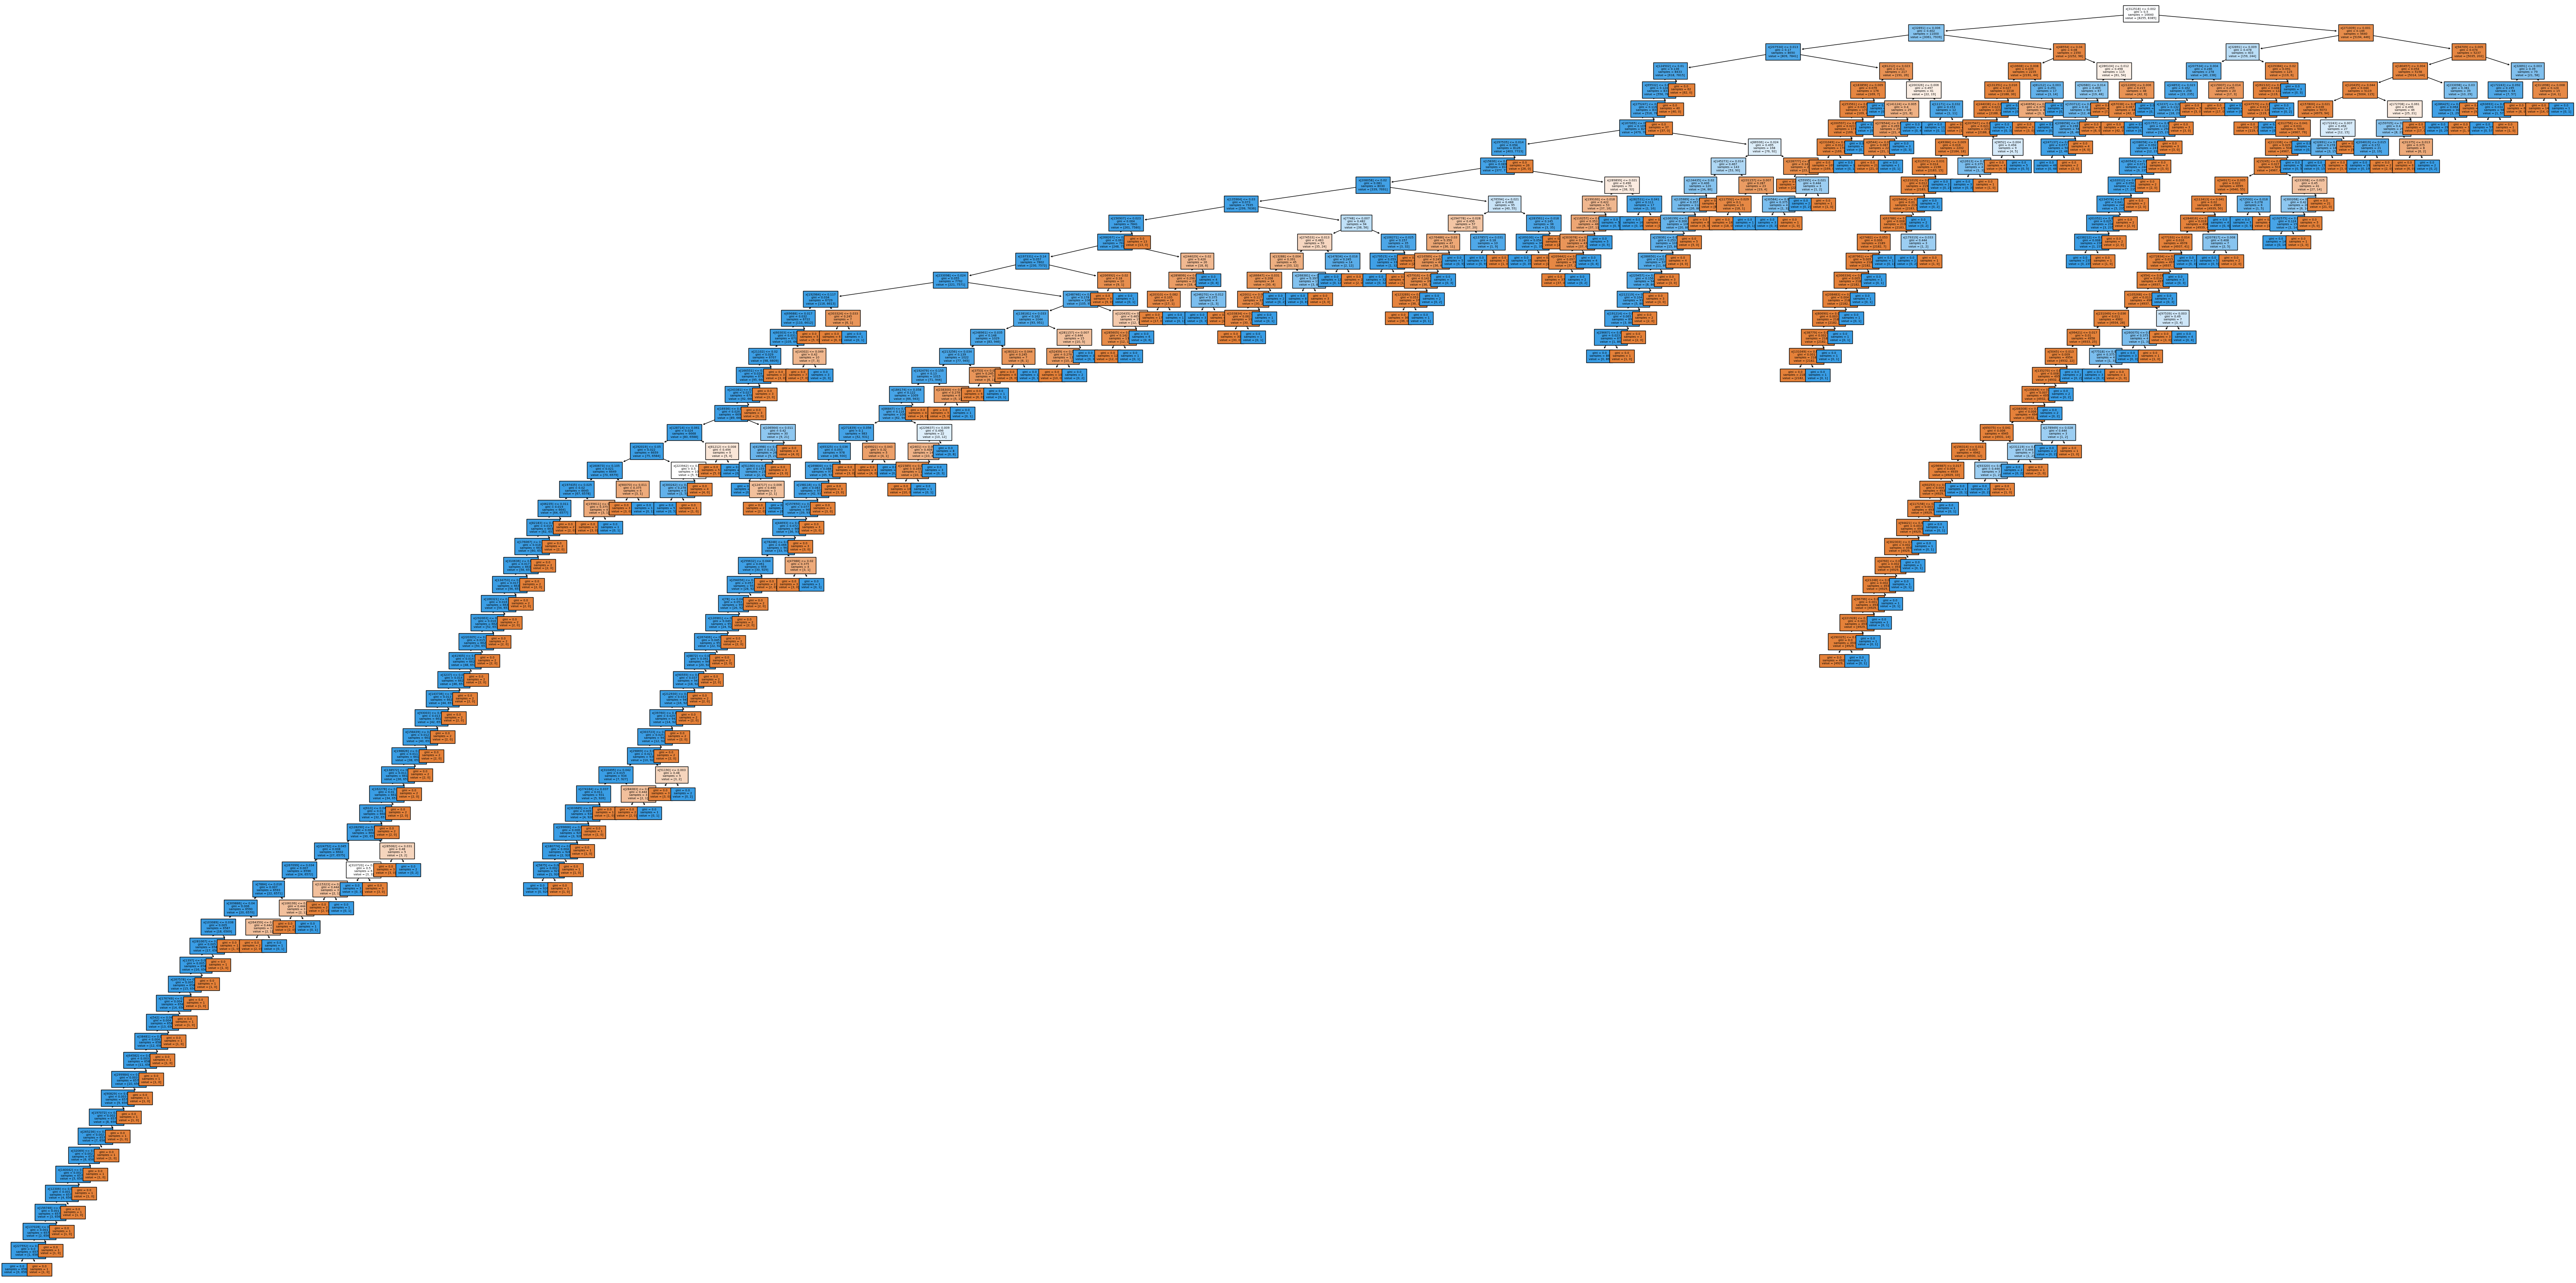

In [128]:
# visualizamos el arbol de decision
plt.figure(figsize=(80,40))
tree.plot_tree(dt, filled=True, fontsize=5)
plt.show()

In [124]:
texto = "House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It,Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, The FBI has learned of the existence of emails that appear to be pertinent to the investigation. Case reopened Jason Chaffetz (@jasoninthehouse) October 28, 2016 Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of “an unrelated case”–which we now know to be Anthony Weiner’s sexting with a teenager. But apparently such little things as facts didn’t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary wins–at least two years’ worth, and possibly an entire term’s worth of them. Apparently Chaffetz thought the FBI was already doing his work for him–resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetz’ sins. That aide told Shareblue that his boss and other Democrats didn’t even know about Comey’s letter at the time–and only found out when they checked Twitter. “Democratic Ranking Members on the relevant committees didn’t receive Comey’s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didn’ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.” So let’s see if we’ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didn’t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesn’t trample on basic standards of fairness, I don’t know what does. Granted, it’s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetz’ planned fishing expedition. But that doesn’t mean we can’t turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious rights worst nightmarea charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect"
texto = clean_text(texto)
texto_tfidf = tfidf.transform([texto])
y_pred_texto = nb.predict(texto_tfidf)

In [135]:
# incluimos otra base de datos de mi ordenador
df_true = pd.read_csv('../data/True.csv')
df_fake = pd.read_csv('../data/Fake.csv')

In [138]:
# creamos una tabla nueva con las dos bases de datos y le añadimos una columna con el valor 0 para las verdaderas y 1 para las falsas
df_true['fake'] = 0
df_fake['fake'] = 1

# unimos las dos bases de datos
df2 = pd.concat([df_true, df_fake], axis=0)

In [141]:
# reordenamos las filas aleatoriamente
df2 = df2.sample(frac=1).reset_index(drop=True)

,title,text,subject,date,fake
0,Myanmar says U.S. sanctions against general ba...,(Reuters) - Myanmar feels sad over a U.S. de...,worldnews,"December 27, 2017",0
1,FLASHBACK VIDEO: Al Sharpton Assaults FOX News...,When did Americans decide they were okay with ...,Government News,"Mar 31, 2016",1
2,Kerry Washington Just Delivered A PERFECT One...,On the red carpet at Sunday s Golden Globe Awa...,News,"January 8, 2017",1
3,WOW! NEW VIDEO BLOWS UP CORRUPTION Between Oba...,"These videos, by James O Keefe and friends at ...",politics,"Oct 26, 2016",1
4,BEHIND THE CURTAIN: How Obama Plans To Prevent...,There is nothing about Obama s executive order...,Government News,"Jan 6, 2016",1
...,...,...,...,...,...
44893,(VIDEO) HACKERS WIN THE “SPY LOTTO” WITH MASSI...,OUR INEPT GOVERNMENT DIDN T INSTALL PROTECTION...,Government News,"Jun 13, 2015",1
44894,WOW! HILLARY PRETENDED To Be Relaxing…But She’...,Democratic Party presidential nominee Hillary ...,left-news,"Nov 26, 2016",1
44895,NEW ACCUSATION AGAINST BERNIE SANDERS Exposes ...,"By now, it s pretty clear that Bernie doesn t ...",left-news,"Dec 18, 2015",1
44896,GOP VETERAN AND DOUBLE AMPUTEE Scorches Democr...,Brian Mast scorched the Democrats for their ly...,Government News,"May 5, 2017",1


In [142]:
#juntamos el titulo y el texto
df2['text'] = df2['title'] + ' ' + df2['text']

# eliminamos las columnas que no necesitamos
df2 = df2.drop(['title', 'subject', 'date'], axis=1)

# limpiamos el texto
df2['text'] = df2['text'].apply(clean_text)

In [143]:
df2

,text,fake
0,myanmar say u s sanction general base unreli a...,0
1,flashback video al sharpton assault fox news r...,1
2,kerri washington just deliv a perfect one line...,1
3,wow new video blow up corrupt between obama de...,1
4,behind the curtain how obama plan to prevent c...,1
...,...,...
44893,video hacker win the spi lotto with massiv cyb...,1
44894,wow hillari pretend to be relax but she been s...,1
44895,new accus against berni sander expos him as th...,1
44896,gop veteran and doubl ampute scorch democrat f...,1


# Decision Tree

In [144]:
# creamos las variables X e y
X = df2['text']
y = df2['fake']

# dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# vectorizamos
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# usamos el modelo decision tree ya entrenado
y_pred = dt.predict(X_test_tfidf)

# calculamos la matriz de confusión
confusion_matrix(y_test, y_pred)

ValueError: X has 72778 features, but DecisionTreeClassifier is expecting 316066 features as input.